In [1]:
import os, shutil

In [2]:
# Calea catre folderul cu imagini pentru antrenare
original_dataset_dir = 'C:/Users/danij/Desktop/Practica/5.2_test/train'

# Calea unde vom stoca folderul mai mic de date
base_dir = 'C:/Users/danij/Desktop/Practica/5.2_test/cats_and_dogs_small'
os.mkdir(base_dir)

# Caile pentru antrenare, testare si validare
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Catre pozele cu pisici pentru antrenare
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Catre pozele cu caini pentru antrenare
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Catre pozele cu pisici pentru validare
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Catre pozele cu caini pentru validare
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Catre pozele cu pisici pentru testare
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Catre pozele cu caini pentru testare
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Se copiaza primele 1000 de poze cu pisici pentru antrenare
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Se copiaza urmatoarele 500 pentru validare
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Se copiaza urmatoarele 500 pentru testare
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Primele 1000 de poze cu caini pentru antrenare
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Urmatoarele 500 pentru validare
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Urmatoarele 500 pentru testare
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [4]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [5]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [6]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [7]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [8]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [11]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator

# Redimensionam toate imaginile cu 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # Calea "targetata"
        train_dir,
        # Toate imaginile se vor redimensiona 150x150
        target_size=(150, 150),
        batch_size=20,
        # Avem nevoie de etichete binare
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [14]:
history = model.fit(
      train_generator,
      steps_per_epoch=10,
      epochs=3,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/3
10/10 [==============================] - 10s 989ms/step - loss: 0.7047 - acc: 0.5050 - val_loss: 0.6980 - val_acc: 0.5000
Epoch 2/3
10/10 [==============================] - 8s 877ms/step - loss: 0.7048 - acc: 0.4550 - val_loss: 0.6912 - val_acc: 0.5000
Epoch 3/3
10/10 [==============================] - 9s 900ms/step - loss: 0.6924 - acc: 0.5050 - val_loss: 0.6922 - val_acc: 0.4990


In [15]:
model.save('cats_and_dogs_small_1.keras')

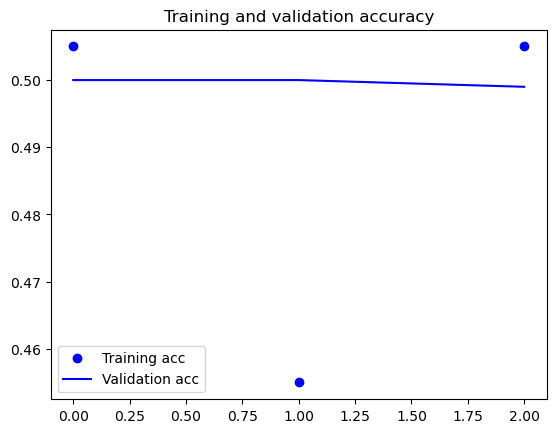

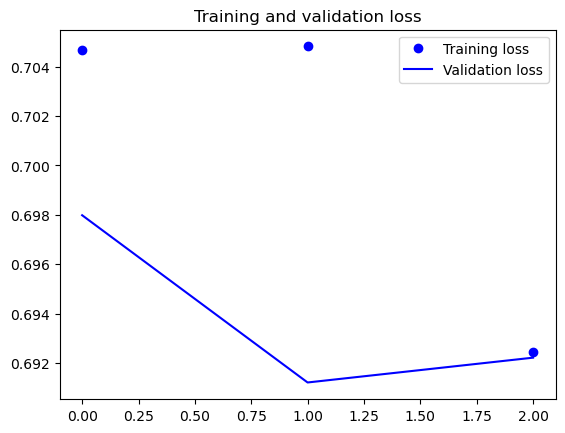

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

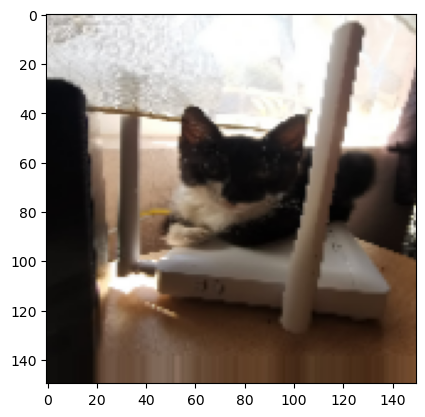

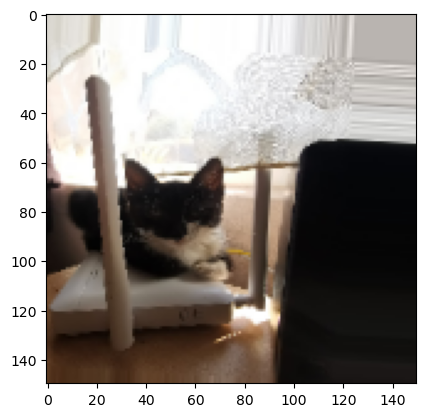

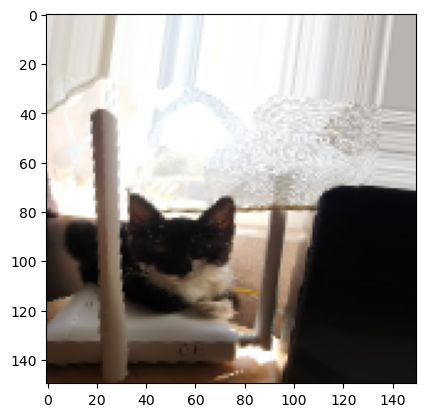

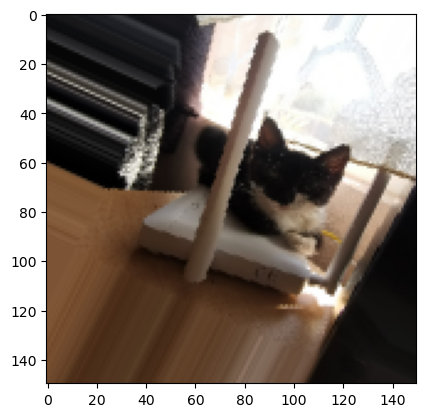

In [45]:
# Modulul imaginilor preprocesate
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# Alegem o imagine pentru a o "spori"
img_path = fnames[2]

# Citim imaginea si o redimensionam
img = image.load_img(img_path, target_size=(150, 150))

# O convertim intr-un vector Numpy de dimensiunile(150, 150, 3)
x = image.img_to_array(img)

# Redimensionam la (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# Comanda .flow() genereaza loturi de imagini aleatorii transformate
# E loop infinit deci il oprim candva
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        
        train_dir,
        
        target_size=(150, 150),
        batch_size=5,
        
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=4,
      epochs=4,
      validation_data=validation_generator,
      validation_steps=7)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/4
4/4 [==============================] - 2s 251ms/step - loss: 0.7763 - acc: 0.5500 - val_loss: 0.6844 - val_acc: 0.5714
Epoch 2/4
4/4 [==============================] - 1s 206ms/step - loss: 0.7021 - acc: 0.4500 - val_loss: 0.7571 - val_acc: 0.3143
Epoch 3/4
4/4 [==============================] - 1s 189ms/step - loss: 0.7206 - acc: 0.5500 - val_loss: 0.7012 - val_acc: 0.4857
Epoch 4/4
4/4 [==============================] - 1s 197ms/step - loss: 0.7183 - acc: 0.3500 - val_loss: 0.7032 - val_acc: 0.4571


In [21]:
model.save('cats_and_dogs_small_2.keras')

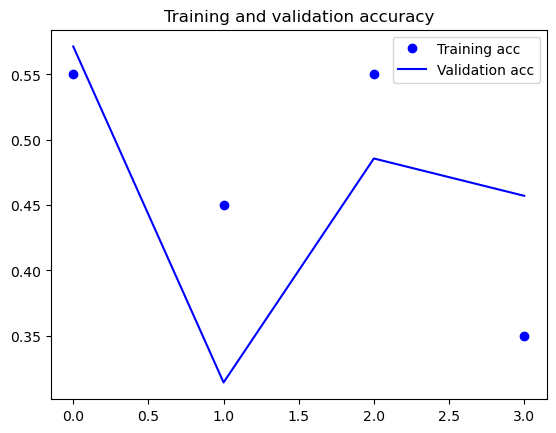

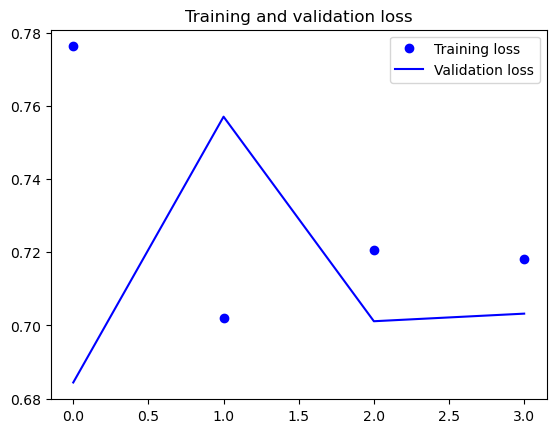

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()